# Introduction

#### Dataset

Dataset merupakan kumpulan data untuk layanan Uber dan Lyft dari tanggal 11-26-2018 sampai dengan 12-18-2018

#### Sumber Dataset

Sumber asli dataset berasal dari kaggle : https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma

#### Objective 

Objective yang ingin diperoleh adalah memprediksi harga layanan dengan menggunakan regresi 

# 2. Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## for feature slection
from sklearn.ensemble import RandomForestRegressor

#pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# Model Regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge

# for matrics evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Data Loading 

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/rideshare_kaggle.csv')

#### Melihat 5 data teratas 

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


#### Melihat 5 data terbawah 

In [5]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


#### Melihat nilai statistika dari dataset

In [6]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

#### Melihat Informasi mengenai dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

#### Melihat shape dari dataset 

In [8]:
df.shape

(693071, 57)

dataset terdiri atas 57 columns dan 693071 rows

# 4. Data Cleaning

In [9]:
cols_to_use = ['hour', 'source', 'destination', 'cab_type', 'name', 'distance', 'price']

dataset = df.copy()
dataset = df[cols_to_use]
dataset.head()

,hour,source,destination,cab_type,name,distance,price
0,9,Haymarket Square,North Station,Lyft,Shared,0.44,5.0
1,2,Haymarket Square,North Station,Lyft,Lux,0.44,11.0
2,1,Haymarket Square,North Station,Lyft,Lyft,0.44,7.0
3,4,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,26.0
4,3,Haymarket Square,North Station,Lyft,Lyft XL,0.44,9.0


# 5. Explorasi Data

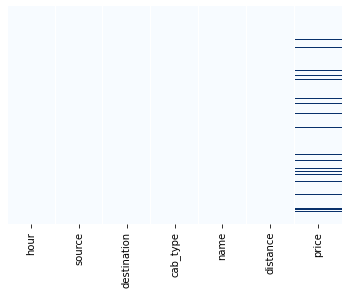

In [10]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues");

Dari visualisasi terlihat bahwa feature price memiliki missing values

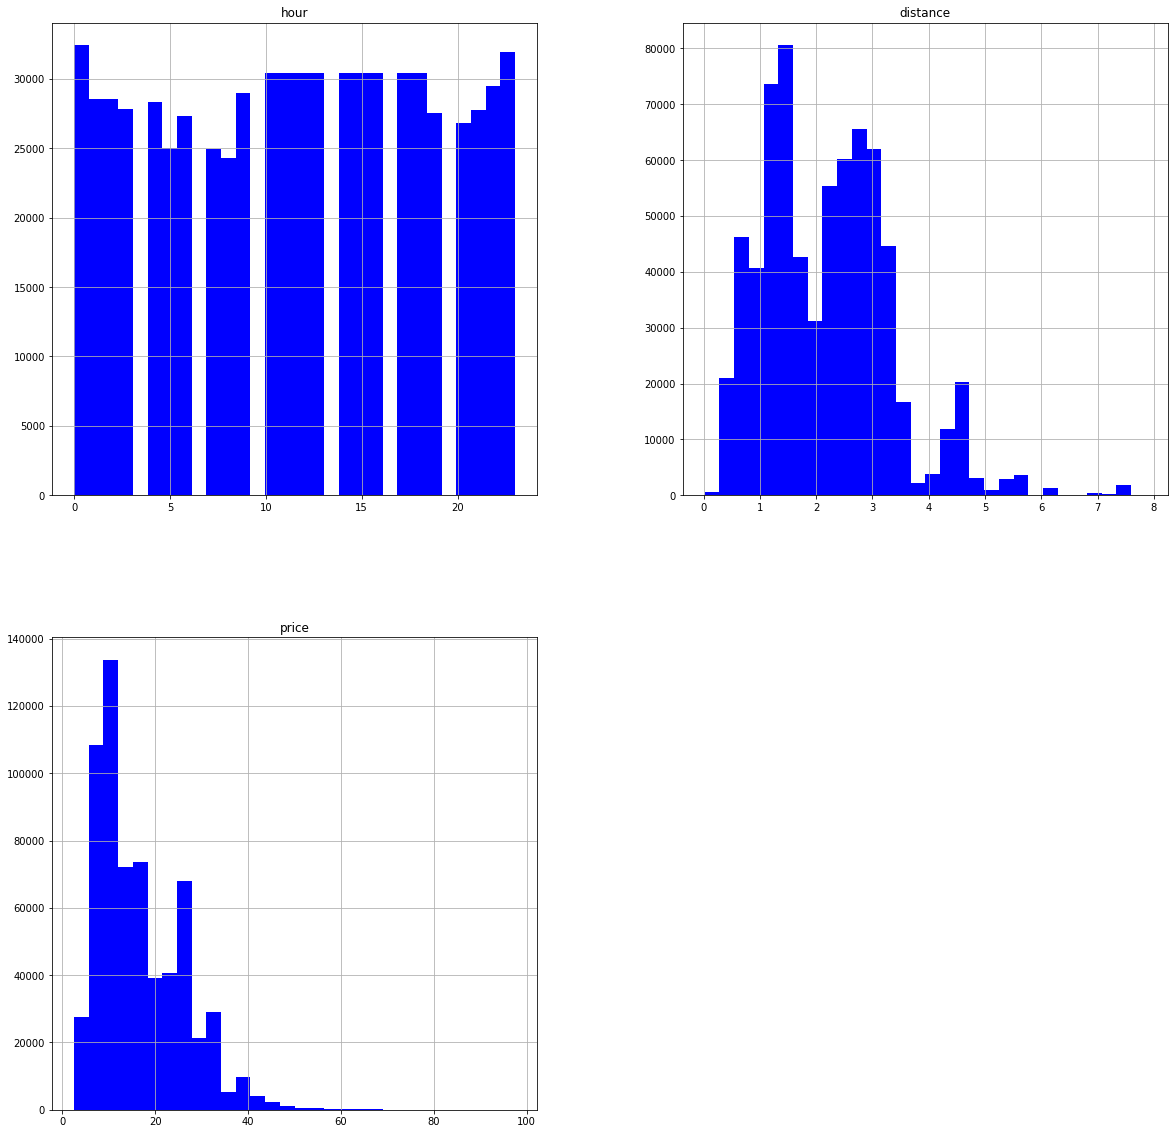

In [11]:
dataset.hist(bins = 30, figsize = (20,20), color = 'blue');

### Visualisasi Numerical Features

In [12]:
Numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes!='O']

print("Jumlah Numerical Features {}".format(len(Numerical_features)))

Jumlah Numerical Features 3


#### Visualisasi Features Destination Terhadap Features Price

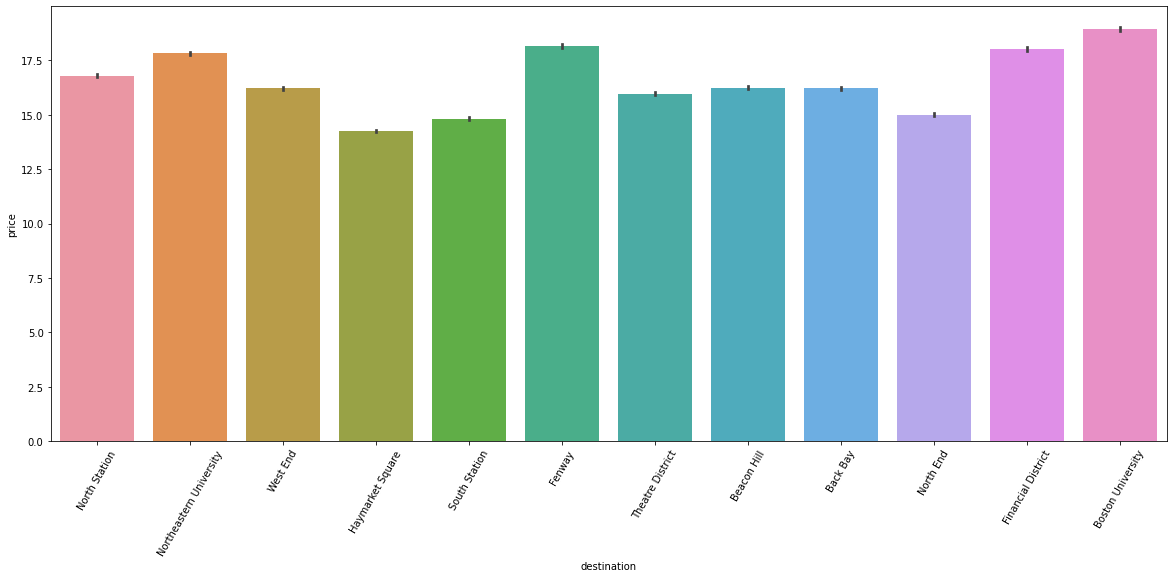

In [13]:
plt.figure(figsize=(20,8))
sns.barplot(x='destination',y='price',data=dataset);
plt.xticks(rotation = 60);

Dari hasil visualisasi terlihat bahwa price rata-rata tertinggi adalah untuk tempat tujuan 'Boston University', 'Fenway'  dan 'Financial District'

#### Visualisasi Features Source Terhadap Features Price

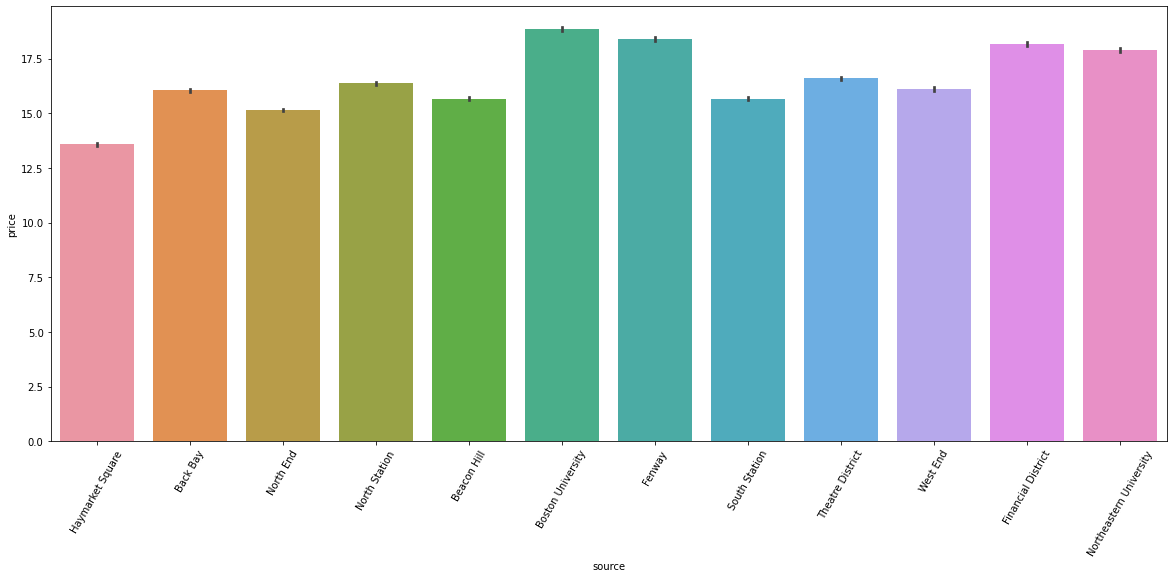

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(x='source',y='price',data=dataset);
plt.xticks(rotation = 60);

Dari hasil visualisasi terlihat bahwa price rata-rata tertinggi adalah untuk keberangkatan dari 'Boston University', 'Fenway'  dan 'Financial District'

#### Visualisasi Features Name Terhadap Features Price

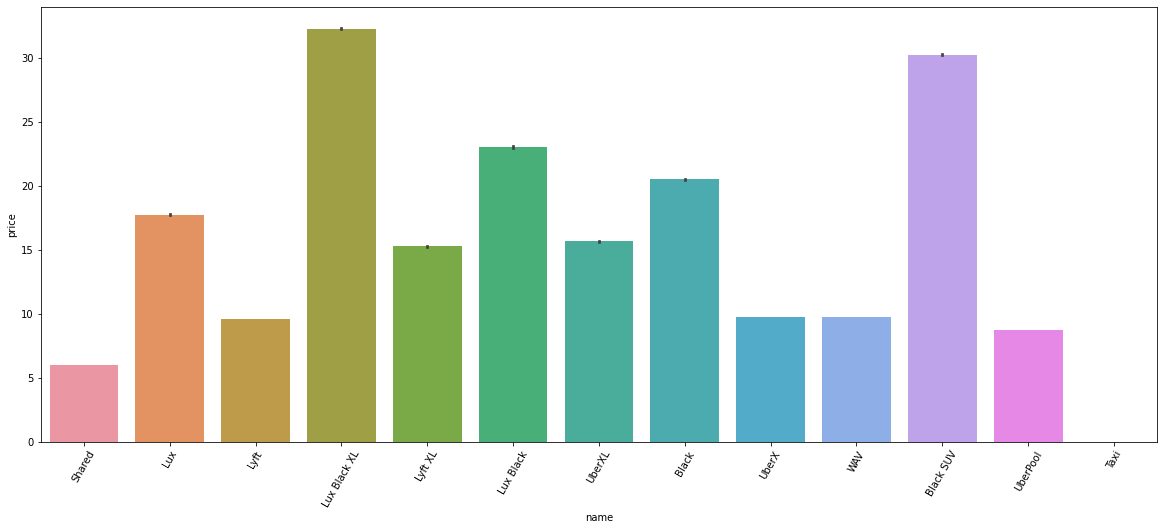

In [15]:
plt.figure(figsize=(20,8))
sns.barplot(x='name',y='price',data=dataset);
plt.xticks(rotation = 60);

Dari hasil visualisasi terlihat bahwa price rata-rata tertinggi adalah untuk layanan 'Black SUV' dan 'Lux Black XL' 

## 5. Features Engineering

#### Membagi data terlebih dahulu sebelum menerapkan Rekayasa Fitur (Feature Engineering)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['price'],test_size=0.1,random_state=0)

In [17]:
X_train

,hour,source,destination,cab_type,name,distance,price
21664,18,Financial District,Northeastern University,Lyft,Shared,3.17,9.0
126265,17,Theatre District,Fenway,Lyft,Lux Black XL,3.18,38.0
606306,13,Financial District,Northeastern University,Uber,Black,3.30,27.0
93020,1,Boston University,Theatre District,Lyft,Lux,2.93,19.5
471469,21,Back Bay,Boston University,Uber,Black,1.44,16.0
...,...,...,...,...,...,...,...
359783,22,Back Bay,South Station,Uber,UberXL,3.45,18.0
152315,5,Fenway,West End,Lyft,Lux Black,2.87,26.0
117952,18,West End,Northeastern University,Uber,UberXL,3.08,18.5
435829,2,Theatre District,Fenway,Lyft,Lyft XL,3.17,16.5


untuk menghindari adanya kemungkinan kebocoran data sehingga kita perlu membagi data terlebih dahulu dan kemudian menerapkan fitur engineering

#### Mempersiapkan data untuk dilakukan feature engineering

In [18]:
dataset = X_train

In [19]:
dataset.head()

,hour,source,destination,cab_type,name,distance,price
21664,18,Financial District,Northeastern University,Lyft,Shared,3.17,9.0
126265,17,Theatre District,Fenway,Lyft,Lux Black XL,3.18,38.0
606306,13,Financial District,Northeastern University,Uber,Black,3.30,27.0
93020,1,Boston University,Theatre District,Lyft,Lux,2.93,19.5
471469,21,Back Bay,Boston University,Uber,Black,1.44,16.0


#### Melihat missing data

In [20]:
dataset.shape

(623763, 7)

In [21]:
dataset.isna().sum()

hour               0
source             0
destination        0
cab_type           0
name               0
distance           0
price          49610
dtype: int64

terlihat bahwa terdapat 49610 missing values pada variabel price

In [22]:
dataset.dropna(inplace=True)
dataset.isna().sum()

hour           0
source         0
destination    0
cab_type       0
name           0
distance       0
price          0
dtype: int64

melakukan proses dropna atau menghapus rows dalam mengatasi missing values variabel price, hal tersebut dilakukan karena variabel value merupakan variabel dependent

### Mengubah categorical menjadi numerical

In [23]:
dataset = pd.get_dummies(dataset, drop_first=True)


In [24]:
dataset.head()

,hour,distance,price,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
21664,18,3.17,9.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
126265,17,3.18,38.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
606306,13,3.30,27.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
93020,1,2.93,19.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
471469,21,1.44,16.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# 7. Pendefinisian Model

#### Melakukan pendefinisian variabel independent(X) dan variabel dependent (y)

In [25]:
X = dataset.drop(['price'], axis=1)
y = dataset['price']

# 8. Pelatihan Model

#### Melakukan Split data

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

membagi data training sebesar 0.8 dan data test sebesar 0.2 dengan random state 42

#### Melakukan Standarisasi Data

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train) 

#### Create model and train (Linear Regression)

In [28]:
linear_reg = LinearRegression(fit_intercept=True)

%time linear_reg.fit(X_train_trf, y_train)

CPU times: user 1.19 s, sys: 352 ms, total: 1.54 s
Wall time: 1.03 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Create model and train (Lasso Regression)

In [29]:
lasso_reg = linear_model.Lasso(alpha=0.001, max_iter=100, tol=0.01)

%time lasso_reg.fit(X_train_trf, y_train)

CPU times: user 2.2 s, sys: 139 ms, total: 2.34 s
Wall time: 1.29 s


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.01, warm_start=False)

#### Create model and train (Ridge Regression)

In [30]:
ridge_reg = Ridge(alpha=0.1, max_iter=1000, tol=0.001)

%time ridge_reg.fit(X_train_trf, y_train)

CPU times: user 208 ms, sys: 140 ms, total: 348 ms
Wall time: 184 ms


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# 9. Evaluasi Model

#### Melakukan standarisasi X_val

In [31]:
X_val_trf = scaler.transform(X_val)

#### Linear Regression

In [32]:
%time y_preds = linear_reg.predict(X_val_trf)

CPU times: user 7.83 ms, sys: 5.91 ms, total: 13.7 ms
Wall time: 16.6 ms


In [33]:
linear_reg.score(X_val_trf, y_val)

0.8950328374124507

In [34]:
linear_reg.score(X_train_trf, y_train)

0.8943492844655905

In [35]:
R2_score_lin = r2_score(y_val, y_preds)
print(f'R2_score : {R2_score_lin: .2f}')

MAE = mean_absolute_error(y_val, y_preds)
print(f'MAE: {MAE:.2f}')

MSE = mean_squared_error(y_val, y_preds)
print(f'MSE: {MSE:.2f}') 

R2_score :  0.90
MAE: 1.93
MSE: 9.12


#### Lasso Regression

In [36]:
%time y_preds_lasso = lasso_reg.predict(X_val_trf)

CPU times: user 8.96 ms, sys: 5 ms, total: 14 ms
Wall time: 14.2 ms


In [37]:
lasso_reg.score(X_val_trf, y_val)

0.8950399928237013

In [38]:
lasso_reg.score(X_train_trf, y_train)

0.8943515071580296

In [39]:
R2_score_lasso = r2_score(y_val, y_preds_lasso)
print(f'R2_score : {R2_score_lasso: .2f}')

MAE_lasso = mean_absolute_error(y_val, y_preds_lasso)
print(f'MAE_lasso: {MAE_lasso:.2f}')

MSE_lasso = mean_squared_error(y_val, y_preds_lasso)
print(f'MSE_lasso: {MSE_lasso:.2f}') 

R2_score :  0.90
MAE_lasso: 1.93
MSE_lasso: 9.12


#### Ridge Regression

In [40]:
%time y_preds_ridge = ridge_reg.predict(X_val_trf)

CPU times: user 10.2 ms, sys: 3.02 ms, total: 13.2 ms
Wall time: 6.71 ms


In [41]:
ridge_reg.score(X_val_trf, y_val)

0.8950354103036816

In [42]:
ridge_reg.score(X_train_trf, y_train)

0.8943528692404362

In [43]:
R2_score_ridge = r2_score(y_val, y_preds_ridge)
print(f'R2_score : {R2_score_ridge: .2f}')

MAE_ridge = mean_absolute_error(y_val, y_preds_ridge)
print(f'MAE_ridge: {MAE_ridge:.2f}')

MSE_ridge = mean_squared_error(y_val, y_preds_ridge)
print(f'MSE_ridge: {MSE_ridge:.2f}') 

R2_score :  0.90
MAE_ridge: 1.93
MSE_ridge: 9.12


In [44]:
model = pd.Series(['Linear Regression', 'Lasso', 'Ridge'])

In [45]:
R2_score = pd.Series([R2_score_lin, R2_score_lasso, R2_score_ridge ])
MAE_score = pd.Series([MAE, MAE_lasso, MAE_ridge ])
MSE_score = pd.Series([MSE, MSE_lasso, MSE_ridge ])

In [46]:
choose_regression = pd.DataFrame({'Regression': model, 'R2_score': R2_score, 'MAE_score': MAE_score, 'MSE_score': MSE_score})
choose_regression

,Regression,R2_score,MAE_score,MSE_score
0,Linear Regression,0.895033,1.933733,9.116537
1,Lasso,0.895040,1.934078,9.115916
2,Ridge,0.895035,1.934385,9.116314


Dari hasil perbandingan model terlihat bahwa ketiga model memiliki Mean Absolute Error relatif yang sama sebesar 1.93 namun dikarenakan waktu training lebih cepat dari model Linear Regression dam Lasso Regression maka diputuskan untuk menggunakan model Ridge Regression 

# 10. Model Inference

#### Membuat data baru

In [48]:
values_1 = [9,	1.04,	0, 0,	0, 0,	0, 1, 0, 0,	0, 0, 0, 0,	0, 0,	1, 0,	0, 0, 0, 0,	0, 0,	1, 0,	0, 0,	0, 0, 0, 0, 1, 0, 0, 0]
values_2 = [9,	3.18,	0, 0,	0, 0,	0, 0,	1, 0,	0, 0,	0, 0,	1, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 1,	0, 0,	0, 0]

In [49]:
values = [ values_1, values_2]

In [50]:
dataset.columns

Index(['hour', 'distance', 'price', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'destination_West End', 'cab_type_Uber',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

In [51]:
data_dummies = pd.DataFrame(values, columns=['hour', 'distance', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'destination_West End', 'cab_type_Uber',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'])

In [52]:
data_dummies

,hour,distance,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,1.04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,9,3.18,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [53]:
data_dummies_trf = scaler.transform(data_dummies)
data_dummies_trf

array([[-0.37882042, -1.01187812, -0.30046678, -0.30170966, -0.30131008,
        -0.30452686, -0.3011897 ,  3.31784634, -0.29966935, -0.30171396,
        -0.30188142, -0.30193722, -0.30088862, -0.3002557 , -0.3012198 ,
        -0.30209602,  3.2798306 , -0.3015808 , -0.30171396, -0.29991088,
        -0.3011725 , -0.3011467 , -0.30140463, -0.30073801,  0.9646076 ,
        -0.30744998, -0.29590433, -0.29566495, -0.29507682, -0.29527731,
        -0.29555174, -0.29581294,  3.26383138, -0.30764081, -0.30778071,
        -0.30753056],
       [-0.37882042,  0.87160854, -0.30046678, -0.30170966, -0.30131008,
        -0.30452686, -0.3011897 , -0.30140034,  3.33701128, -0.30171396,
        -0.30188142, -0.30193722, -0.30088862, -0.3002557 ,  3.31983492,
        -0.30209602, -0.3048938 , -0.3015808 , -0.30171396, -0.29991088,
        -0.3011725 , -0.3011467 , -0.30140463, -0.30073801, -1.03669098,
        -0.30744998, -0.29590433, -0.29566495, -0.29507682, -0.29527731,
        -0.29555174,  3.38051

#### Mencoba prediksi dengan data X

In [54]:
predictions = ridge_reg.predict(data_dummies_trf)

print("Hasil Prediksi harga dengan model Ridge Regression: \n")
print('Prediksi Harga untuk rute Perjalanan 1 adalah {}'.format(round(predictions[0],2)))
print('Prediksi Harga untuk rute Perjalanan 2 adalah {} '.format(round(predictions[1],2)))

Hasil Prediksi harga dengan model Ridge Regression: 

Prediksi Harga untuk rute Perjalanan 1 adalah 6.03
Prediksi Harga untuk rute Perjalanan 2 adalah 8.65 


# 11. Kesimpulan

### 11.1 Model Analysis

In [55]:
params = pd.Series(ridge_reg.coef_, index=X.columns)

In [56]:
analisis = pd.DataFrame(params.round(0),X.columns,columns=['Coeff'])
analisis

,Coeff
hour,0.0
distance,3.0
source_Beacon Hill,-0.0
source_Boston University,-0.0
source_Fenway,-0.0
source_Financial District,0.0
source_Haymarket Square,0.0
source_North End,0.0
source_North Station,-0.0
source_Northeastern University,-0.0


#### Model Analysis :

Dengan menggunakan Model Ridge Regression terdapat beberapa variabel yang memiliki relasi positif terhadap varibel price, yaitu:

* Dengan memegang semua fitur lainnya tetap, peningkatan rata-rata 1 unit feature distance akan menyebabkan peningkatan total 3 unit feature price.

* Dengan memegang semua fitur lainnya tetap, peningkatan rata-rata 1 unit feature cab_type_Uber akan menyebabkan peningkatan total 1 unit variabel price.

* Dengan memegang semua fitur lainnya tetap, peningkatan rata-rata 1 unit feature name_Black SUV akan menyebabkan peningkatan total 3 unit feature price.

* Dengan memegang semua fitur lainnya tetap, peningkatan rata-rata 1 unit feature name_Lux Black akan menyebabkan peningkatan total 1 unit feature price.

* Dengan memegang semua fitur lainnya tetap, peningkatan rata-rata 1 unit feature name_Lux Black XL akan menyebabkan peningkatan total 4 unit variabel price.

### 11.2 Overall Analysis

Analisa secara keseluruhan:
* Dataset merupakan kumpulan data untuk layanan Uber dan Lyft.
* Objective yang ingin didapat adalah memprediksi variabel price
* Secara keseluruhan dataset terdiri dari 57 columns dan 693071 rows
* Dalam data preprocessing dilakukan pemilihan variabel 'hour', 'source', 'destination', 'cab_type', 'name', 'distance' karena kemungkinan memiliki pengaruh dalam melakukan prediksi variabel 'price'
* Dari explorasi data dapat terlihat bahwa:
    * Dari visualisasi terlihat bahwa Variabel Distance memiliki korelasi terbesar terhadap variabel price yaitu sebesar 0.35
    * Dari hasil visualisasi terlihat bahwa price rata-rata tertinggi adalah untuk tempat tujuan 'Boston University', 'Fenway' dan 'Financial District'
    * Dari hasil visualisasi terlihat bahwa price rata-rata tertinggi adalah untuk keberangkatan dari 'Boston University', 'Fenway' dan 'Financial District'
    * Dari hasil visualisasi terlihat bahwa price rata-rata tertinggi adalah untuk layanan 'Black SUV' dan 'Lux Black XL'
* Melakukan proses get dummies untuk mengubah variabel categorical yaitu variabel 'source', 'destination', 'cab_type', 'name' menjadi numeric
* Dalam proses data cleaning terlihat bahwa terdapat 55095 missing values pada variabel price, dan untuk mengatasi missing values tersebut dilakukan proses dropna atau menghapus rows dalam mengatasi missing values variabel price, hal tersebut dilakukan karena variabel value merupakan variabel dependent
* Menggunakan model Regression Karena Objective yang ingin dicapai adalah melakukan prediksi terhadap variabel price, untuk itu kita akan coba menggunakan Linear Regression, Lasso Regression, dan Ridge Regression dan membandingkan performa dari ketiga model tersebut
* Dalam melakukan split data dilakukan dengan membagi data training sebesar 0.7 dan data test sebesar 0.3 dengan random state 42
* Dari hasil perbandingan model terlihat bahwa ketiga model memiliki Mean Absolute Error relatif yang sama sebesar 1.93 namun dikarenakan waktu training lebih cepat dari model Linear Regression dam Lasso Regression maka diputuskan untuk menggunakan model Ridge Regression 
* Dari hasil prediksi variabel price dengan menggunakan model Ridge Regression didapatkan hasil R2_score :  0.89, MAE_ridge: 1.93, MSE_ridge: 9.24